In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint, EarlyStopping


In [3]:
# Load the dataset
data = pd.read_csv("../data/fixed_data.csv")  # Replace with your file path

In [4]:
# Feature Engineering: Calculate GPA improvement (proxy for target)
data['gpaImprovement'] = data['secondTermGpa'] - data['firstTermGpa']

In [5]:
# Estimate third semester GPA as Second Term GPA + Improvement Trend (or synthetic target)
data['Predicted_Third_Semester_GPA'] = data['secondTermGpa'] + data['gpaImprovement']

In [6]:
# Select features: you can choose more or remove based on your dataset
X = data.drop(['Predicted_Third_Semester_GPA','gpaImprovement'],axis=1)
y = data['Predicted_Third_Semester_GPA']

In [7]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Define the neural network model
model = Sequential()

# Add input layer with 5 features (based on the selected features)
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Add hidden layers
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

# Output layer (predicting continuous third semester GPA)
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

d:\fall2024\neural network\project\code\scripts\myenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
best_model_filepath = "../models/gpa_prediction_model.keras"

# ModelCheckpoint callback
modelCheckpoint = ModelCheckpoint(
    filepath=best_model_filepath,
    monitor='val_loss',
    save_best_only=True,
    mode='max',
    verbose=1)
#EarlyStopping callback
earlyStopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    restore_best_weights=True,

)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,377 (21.00 KB)

 Trainable params: 5,377 (21.00 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Train the model
history = model.fit(
    X_train,
    y_train, 
    epochs=100, 
    batch_size=10, 
    validation_split=0.2,
    callbacks=[modelCheckpoint,earlyStopping],
    verbose=1)


Epoch 1/100
70/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.8021
Epoch 1: val_loss improved from -inf to 1.60685, saving model to ../models/gpa_prediction_model.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.6524 - val_loss: 1.6069
Epoch 2/100
58/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1043 
Epoch 2: val_loss did not improve from 1.60685
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0455 - val_loss: 0.5214
Epoch 3/100
53/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4169 
Epoch 3: val_loss did not improve from 1.60685
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3786 - val_loss: 0.2525
Epoch 4/100
45/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2235 
Epoch 4: val_loss did not improve from 1.60685
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2282 - val_loss: 0.1767
Epoch 5/100
77/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1021
Epoch 5: val_loss did not improve from 1.60685
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1041 - val_loss: 0.1504
Epoch 6/100


In [13]:
# Predict on the test set
y_pred = model.predict(X_test)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [14]:

# Evaluate the model: Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 0.07417924533743966


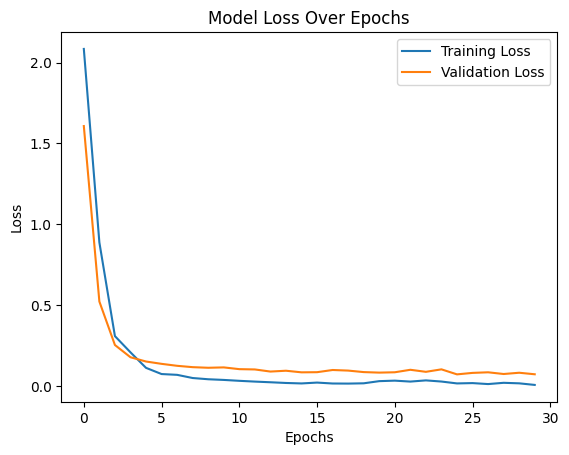

In [15]:
# Visualize the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

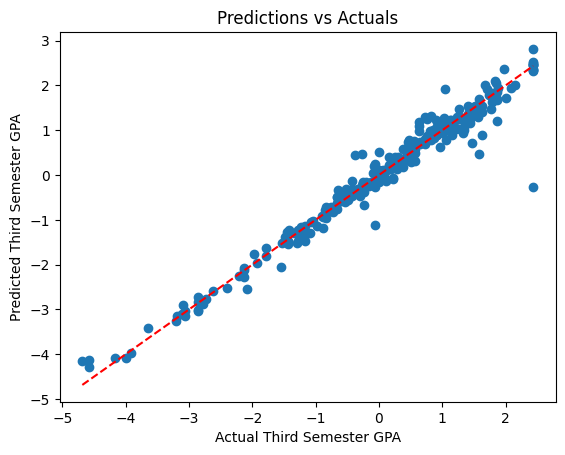

In [16]:
# Visualize predictions vs actual
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal line
plt.xlabel("Actual Third Semester GPA")
plt.ylabel("Predicted Third Semester GPA")
plt.title("Predictions vs Actuals")
plt.show()